In [ ]:
import vk

In [ ]:
token = '58804c0458804c0458804c042658ed2ac45588058804c040523c7a2bb55f107daaf7a2a'

In [ ]:
session = vk.Session(access_token = token) # открыть сессию для работы
api = vk.API(session) # подключиться к API

In [ ]:
group = 'thevyshka'

In [ ]:
res = api.wall.get(domain = group, count = 100, v = 5.73)

In [ ]:
res

In [ ]:
res.keys()

In [ ]:
res['items'][0] # первый элемент items - первый пост со всей информацией о нем

In [ ]:
items = res['items']

In [ ]:
items = res['items']

full_list = []

for item in items:
    L = [item['from_id'], item['id'], item['text'], item['date'],
        item['likes']['count'], item['reposts']['count'], item['comments']['count']]  # нужные поля
    full_list.append(L)  # добавляем в список списков full_list

In [ ]:
# несколько элементов списка
full_list[0:3]

In [ ]:
nposts = 2000

In [ ]:
from time import sleep

In [ ]:
for i in range(2, int(nposts/100) + 1):
    res2 = api.wall.get(domain = group, count = 100, offset = 100 * i, v = 5.73)
    items2 = res2['items']
    items.extend(items2) # добавляем к первой сотне постов в items

In [ ]:
# опять выберем только нужные поля
full_list = []
for item in items:
    L = [item['from_id'], item['id'], item['text'], item['date'],
        item['likes']['count'], item['reposts']['count'], item ['comments']['count'], item['views']['count']]
    full_list.append(L)

In [ ]:
type(['date'])

In [ ]:
import pandas as pd

In [ ]:
full_list

In [ ]:
df = pd.DataFrame(full_list)

In [ ]:
df.columns = ['from_id', 'id', 'text', 'date', 'likes', 'reposts', 'comments', 'views']
df.head(3)

In [ ]:
col_list = list(df)
col_list.remove('from_id')
col_list.remove('id')
col_list.remove('text')
col_list.remove('date')
col_list.remove('views')
col_list

In [ ]:
df['total_actions'] = df[col_list].sum(axis=1)
df

In [ ]:
test2 = df.sort_values(['date'], ascending=[False])
test2 = df.sort_values(['date'], ascending=[0])

In [ ]:
df.head(5)

In [ ]:
from datetime import datetime

In [ ]:
def date_norm(date):
    d = datetime.fromtimestamp(date) # timestamp - UNIX-время в виде строки
    str_d = d.strftime("%Y-%m %H") # %Y-%m-%d %H:%M:%S - год-месяц-день, часы:мин:сек
    date_norm, time_norm = str_d.split(' ') # разобьем результат на части, отделим дату от времени
    return date_norm, time_norm

In [ ]:
df['date_norm'] = df.date.apply(date_norm)

In [ ]:
df.head(10)

In [ ]:
df.tail(10)
#пытаемся определить, какое значение "date" будет равно сентябрю 2018 года, так как наш анализ берет период с сентября 2018 по октябрь 2019 

In [ ]:
df = df.loc[df['date'] >= 1535796013]
#определили значения и отрезает датасет до него включительно

In [ ]:
df.tail(10)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

In [ ]:
df['date_norm'] = df.date.apply(date_norm)

In [ ]:
type(df['date_norm'][1][1])

In [ ]:
def get_date(date):
    return date[0]

def get_time(date):
    return date[1]

In [ ]:
df['Date'] = df.date_norm.apply(get_date)
df['Time'] = df.date_norm.apply(get_time)

In [ ]:
total_actions = df.sort_values(['total_actions'], ascending=[False])
total_actions = df.sort_values(['total_actions'], ascending=[0])

In [ ]:
total_actions

In [ ]:
df.head()

In [ ]:
import ast

In [ ]:
# опять выберем только нужные поля
full_list_text = []
for item in items:
    L = [item['text']]
    full_list_text.append(L)

In [ ]:
df1 = pd.DataFrame(full_list_text)

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
df1.head()

In [ ]:
from collections import Counter
counts = Counter(df1[0])
print(counts)

In [ ]:
#Делаем облако часто упоминаемых слов
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words = set(stop_words)

In [ ]:
stop_words = list(stop_words)
ffff = ['вышки', 'com', 'vk', 'app', 'android', 'id', 'org', 'ru', 'html', 'thevyshka', 'apple', 'new', 'почему', 'найти', 'могут', 'который', 'рассказывает', 'ваша', 'вышка', 'the', 'io', 'вшэ', 'например', 'узнаете', 'которые', 'сайте', 'работы', 'истории', 'news', 'wall', 'узнать', 'google', 'помогут', 'каждый', 'собрали', 'hse', 'книга', 'истории', 'несколько', 'жизни', 'помощью', 'ул', 'других', 'цена', 'авторы', 'курс', 'поэтому', 'сегодня', 'store', 'поможет']
for i in ffff:
    stop_words.append(i)

In [ ]:
stop_words = set(stop_words)

In [ ]:
text = Counter(df1[0].to_string(index=False).replace('\n','').lower().split()).most_common(1000)

In [ ]:
import functools 
import operator  
  
def convertTuple(tup): 
    str = functools.reduce(operator.add, (tup)) 
    return str

In [ ]:
most_used_words =''
for text in Counter(df1[0].to_string(index=False).replace('\n','').lower().split()).most_common(1000):
    
    most_used_words = most_used_words.join([word for word in str(text).split() if word not in (stop_words)])

In [ ]:
most_used_words

In [ ]:
def transform_to_text(list_text):
    result_text = ''
    word_regexp = re.compile(r'[а-яa-z]+')
    hashtag_regexp = re.compile(r'@[а-яa-z]+')
    for text in list_text:
        text_without_hashtag = hashtag_regexp.sub('', text.lower())
        result_text += ' '.join(word_regexp.findall(text_without_hashtag.lower())) + '\n'
    return result_text

In [ ]:
df1.columns = ['most_used_words']

In [ ]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

text = transform_to_text(df1['most_used_words'].tolist())

# создание модели WordCloud с разными параметрами, которые также можно менять
wordcloud = WordCloud(background_color='white',
        stopwords=stop_words,
        max_words=100,
        max_font_size=50,
        random_state=42,
        collocations=False)

# передадим полученный текст модели WordCloud
wordcloud.generate_from_text(text)
 
# изображение
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

# команда, чтобы сохранить картинкой
plt.savefig('worlcloud.png', bbox_inches = 'tight')

#ПРОГНАТЬ ДВАЖДЫ, ЧТОБЫ ОТКРЫЛОСЬ В ТЕТРАДКЕ
#ЕСЛИ ПРОГНАТЬ ОДИН РАЗ, ТО СОХРАНИТСЯ В ПАПКУ С ТЕТРАДКОЙ

In [ ]:
plt.show()

In [ ]:
items = res['items']
z = 0
full_list = []
for item in items:
    try:
    
        L = [item['from_id'], item['id'], item['text'], item['date'],
            item['likes']['count'], item['reposts']['count'], item['comments']['count'], item['views']['count'], ast.literal_eval(str(res['items'][z]['attachments']).replace('[','').replace(']',''))['link']['title']]
        
        full_list.append(L)
    except:
        pass
    z +=1

In [ ]:
df_titles = pd.DataFrame(full_list)

In [ ]:
df_titles.info()

In [ ]:
df_titles.columns = ['from_id', 'id', 'text', 'date', 'likes', 'reposts', 'comments', 'views', 'title']
df_titles.head(3)

In [ ]:
df_titles['dlina'] = df_titles['text'].str.count(' ') + 1

In [ ]:
col_list = list(df_titles)

In [ ]:
col_list

In [ ]:
col_list.remove('from_id')

In [ ]:
col_list.remove('id')

In [ ]:
col_list.remove('date')

In [ ]:
col_list.remove('text')

In [ ]:
col_list.remove('views')

In [ ]:
col_list.remove('title')

In [ ]:
col_list.remove('dlina')

In [ ]:
col_list

In [ ]:
df_titles['total_actions'] = df_titles[col_list].sum(axis=1)
df_titles

In [ ]:
def date_norm(date):
    d = datetime.fromtimestamp(date) # timestamp - UNIX-время в виде строки
    str_d = d.strftime("%Y-%m %H") # %Y-%m-%d %H:%M:%S - год-месяц-день, часы:мин:сек
    date_norm, time_norm = str_d.split(' ') # разобьем результат на части, отделим дату от времени
    return date_norm, time_norm

In [ ]:
df_titles['date_norm'] = df_titles.date.apply(date_norm)

In [ ]:
df_titles.head()

In [ ]:
df_titles['Date'] = df_titles.date_norm.apply(get_date)
df_titles['Time'] = df_titles.date_norm.apply(get_time)

In [ ]:
df_titles.head(1)

In [ ]:
del df_titles['id']

In [ ]:
del df_titles['from_id']

In [ ]:
del df_titles['date']

In [ ]:
del df_titles['date_norm']

In [ ]:
df_titles.head(2)

In [ ]:
df_titles = df_titles[['title', 'text', 'likes', 'reposts', 'comments', 'total_actions', 'views', 'Date', 'Time']]


In [ ]:
df_titles.head()

# Анализ топ-тем по фидбек и просмотрам

In [ ]:
most_total_actions = df.sort_values(['total_actions'], ascending=[False])
most_total_actions = df.sort_values(['total_actions'], ascending=[0])

# Топ-10 тем по фидбеку:
1. Мы не могли оставить вас без шуток про Квентина Тарантино в Москв
2. Делимся ресурсами, где можно бесплатно скачать шаблоны, которые помогут сделать ваше выступление ярким и запоминающимся
3. Мы не привыкли получать подарки, поэтому дарим их любимым читателям в честь нашего [club177784090|грандиозного юбилея]. Будет 16 победителей! \n\n✨ Мы разыгрываем
4. книги о том, как писать научные тексты
5. Делимся книгами, из которых вы узнаете, какие ошибки в переводе самые популярные, как переводится художественная литература, и особенно поэзия, и что делать, если вы не можете перевести текст дословно
6. Собрали для вас книги, которые помогут овладеть искусством нетворкинга и обзавестись широким кругом знакомых
7. The Vyshka вскрыли свои архивы со скриншотами любимых сериалов 2000-х и сделали мемы, которые идеально описывают будни абитуриента
8. Собрали 5 сайтов для тех, у кого не хватает красивых изображений для оформления
9. В Вышке стоит уделять внимание английскому: в конце второго курса — IELTS, а потом — лекции и семинары на нем. Предлагаем несколько ресурсов, которые пополнят ваш словарный запас и помогут увереннее чувствовать себя на парах
10. В каком порядке должны стоять слова в предложении и как избавиться от штампов — нашли для вас несколько книг о копирайтинге и рекламных текстах

In [ ]:
most_viewed = df.sort_values(['views'], ascending=[False])
most_viewed = df.sort_values(['views'], ascending=[0])
most_viewed

# Топ-10 по просмотрам:
1. В этот раз мы слушали лекцию о работе с текстом от создателя самиздата «Батенька, да вы трансформер» и медиаартели «Мамихлапинатана» Егора Мостовщикова. \n \nДелимся с вами записью выступления
2. Мы не могли оставить вас без шуток про Квентина Тарантино в Москве:
3. Language and Myth in the Fantasy Writings of J. R. R. Tolkien», William Provost \nСтатья фокусируется на известных вымышленных языках — эльфийском языке и Черном наречии. Исследуется не только процесс их создания, но и то, как эти языки вписываются в общий миф «Властелина колец» и как помогают создать образы героев, которые на них говорят
4. К первому учебному дню составили чеклист студенческой жизни, чтобы не забыть ничего по-настоящему важного
5. Будет 16 победителей! \n\n✨ Мы разыгрываем
6. Делимся книгами, из которых вы узнаете, какие ошибки в переводе самые популярные, как переводится художественная литература, и особенно поэзия, и что делать, если вы не можете перевести текст
7. Делимся ресурсами, где можно бесплатно скачать шаблоны, которые помогут сделать ваше выступление ярким и запоминающимся
8. Начался учебный год и большинство первокурсников Вышки уже получили свои студенческие билеты. Сегодня расскажем, почему это еще не все и как оформить три главные карты студента
9. Редакторы The Vyshka вскрыли свои архивы со скриншотами любимых сериалов 2000-х и сделали мемы, которые идеально описывают будни абитуриента
10. Поисковик Google часто приходит на помощь в сложных жизненных ситуациях, но иногда он просто вас не понимает. Подсказываем, как формулировать запросы так, чтобы необходимую информацию было легче найти

In [ ]:
most_total_actions = df_titles.sort_values(['total_actions'], ascending=[False])
most_total_actions = df_titles.sort_values(['total_actions'], ascending=[0])

# Топ-10 тем по фидбеку (с тайтлами):
1. Топ по общим действиям по тайтлам:
2. Могли, но не придут на День Вышки
3. «Сплин» на все случаи жизни
4. Егор Жуков: «первый вышкинский политзаключенный»
5. Студент, блогер, либертарианец
6. «Вы зажрались»: как прошли протесты в НИУ ВШЭ
7. Бакалавры 23+
8. Научи: как стать репетитором
9. Пишем идеальное введение
10. Бунт в питерской Вышке

In [ ]:
most_viewed = df_titles.sort_values(['views'], ascending=[False])
most_viewed = df_titles.sort_values(['views'], ascending=[0])

# Топ-10 тем по просмотрам (с тайтлами):
1. «Там правда все занимаются сексом?»: студенты о kinky-вечеринках
2. «Сплин» на все случаи жизни,
3. Секс, Вышка, Рок-н-ролл,
4. Учимся печатать вслепую,
5. Егор Жуков: «первый вышкинский политзаключенный»,
6. Могли, но не придут на День Вышки,
7. «Не знаю, кем стану, когда вырасту»: интервью с Асей Казанцевой,
8. Феминистки бывают разные,
9. Vegan power: от равнодушия к активизму,
10. Zero Waste: как уменьшить мусор

In [ ]:
def get_date(date):
    return date[0]

def get_time(date):
    return date[1]

In [ ]:
df_titles['Date'] = df.date_norm.apply(get_date)
df_titles['Time'] = df.date_norm.apply(get_time)

In [ ]:
df_titles.tail()

In [ ]:
# построение графика с частотой твитов в зависимости от даты
df_titles.groupby('Date').size().plot(kind='bar')
plt.ylabel('количество публикаций')
plt.xlabel('месяц публикаций')

# команда, чтобы сохранить картинкой
plt.savefig('output.png', bbox_inches = 'tight')

####почему только с января, когда с сентября запрос был???????????

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
import pandas as pd
pyo.init_notebook_mode(connected=True) ### чтобы открывался график в тетрадке

In [ ]:
data = [go.Scatter(
        x = df_titles.Time, 
        y = df_titles.total_actions,
        mode = 'markers'
    )]

layout = go.Layout(
        title = 'Общее число действий в зависимости от времени публикации',
        xaxis = dict(title = 'Время публикации, часы'),
        yaxis = dict(title = 'Общее число действий'),
        plot_bgcolor='pink'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter.html') ###добавляем букву i, чтобы график отображался в тетрадке



In [ ]:
months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep2019', 'Oct2019']
data = [go.Bar(
        x = months,
        y = [92, 116, 108,117, 116, 98, 93, 88, 93, 89, 93, 92, 10, 94]
)]
    
layout = go.Layout(
        title = 'Количество публикаций в зависимости от месяца',
        xaxis = dict(title = 'Месяц публикации публикации'), # название оси х
        yaxis = dict(title = 'Кол-во публикаций'), # название оси у
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут в график

pyo.iplot(fig, filename= 'scatter.html') 

In [ ]:
df_titles['text'] = df_titles['text'].replace('\n', '')

In [ ]:
df_titles

In [ ]:
df_titles['dlina'] = df_titles['text'].str.count(' ') + 1

In [ ]:
df_titles['text'] = df_titles['text'].str.replace('\n', ' ')
df_titles['text'] = df_titles['text'].str.lower()

In [ ]:
data = [go.Scatter(
        x = df_titles.dlina, 
        y = df_titles.total_actions,
        mode = 'markers'
    )]

layout = go.Layout(
        title = 'Общее число действий в зависимости от длины текста',
        xaxis = dict(title = 'Длина текста (кол-во слов)'),
        yaxis = dict(title = 'Общее число действий'),
        plot_bgcolor='pink'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter.html') ###добавляем букву i, чтобы график отображался в тетрадке


In [ ]:
writer = pd.ExcelWriter('DataList.xlsx', engine='xlsxwriter')

df_titles.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [ ]:
writer = pd.ExcelWriter('DataListFull.xlsx', engine='xlsxwriter')

df.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

# РЕГРЕССИОННЫЙ АНАЛИЗ

В чем суть:
Нам показалось, что частотного анализа будет недостаточно для того, чтобы вывести интересующие студентов темы, так что мы решили внедрить более интересный метод анализа данных.
Будет использоваться линейная регрессионная модель, цель - вытащить из неё веса различных слов, чтобы выявить, какие слова сильнее всего влияют на общую активность.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from functools import reduce
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import numpy as np

In [ ]:
def CMatrix(CM, labels=['+1','-1']): #взято из семинара, чтобы строить матрицы ошибок (CM)
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

# Линейная регрессия по текстам постов с тайтлами

Линейные модели были разделены на три группы:
- Регрессия по текстам постов с тайтлами (то есть, содержашая ссылки на статьи)
- Регрессия по самим тайтлам статей из ссылок
- Регрессия по текстам вообще всех постов

In [ ]:
daf = df_titles.copy()
daf['target'] = daf['total_actions']
daf.drop('title', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.drop('dlina', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.info()

In [ ]:
target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['text']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df_titles))]) #прописываем range как в таблице
#делаем мешки слов


In [ ]:
vval = X.columns.copy()

In [ ]:
X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=120)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
predictions1 = lm.predict(X_test)

In [ ]:
plt.scatter(y1_test,predictions1)

На графике мы можем видеть то, как соотносятся наши предсказания с тестовой выборкой. В целом всё в порядке, о чем будет свидетельствовать и уровень точности модели

In [ ]:
data = [go.Scatter(
        x = y1_test, 
        y = predictions1,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(199,93,171)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по текстам постов с тайтлами',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке


In [ ]:
qqqq = dict(zip(y1_test, predictions1))

In [ ]:
testframe1 = pd.DataFrame(list(qqqq.items()), columns=['y1test', 'predictions1'])

In [ ]:
testframe1

In [ ]:
writer = pd.ExcelWriter('testframe1.xlsx', engine='xlsxwriter')

testframe1.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [ ]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

In [ ]:
for i in lm.coef_:
    vvval.append(i)

In [ ]:
len(lm.coef_)

In [ ]:
regg = dict(zip(nnname, vvval))

In [ ]:
logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

In [ ]:
logframe

In [ ]:
logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

Соответственно, в табице мы можем видеть слова, которые согласно регрессионной модели сильнее всего влияют на количество действий с постом
Стоит сказать, что описывать его статичным текстом имеет мало смысла, так как регрессионная модель весьма динамична при анализе тем постов, и добавление одного поста в выборку может изменить набор основных слов.
(В такие моменты у меня появляется ощущение, что линейная регрессионная модель была не самым лучшим выбором, пусть и весьма интуитивным. Тем не менее, эта модель имеет хороший потенциал для её качественного анализа и практического использования для определения тем постов. В данном случае, в контексте прикладной задачи, динамичность модели становится её плюсом, так как она производит достаточно большое количество разнообразных тем)

In [ ]:
logframe2.head(20)

In [ ]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

In [ ]:
logframe2.tail(20)

In [ ]:
len(df_titles)

In [ ]:
print((lm.intercept_, lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3], lm.coef_[4]))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
y_hat = lm.predict(X_train)

In [ ]:
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_hat) #99 процентов попаданий

In [ ]:
len(df_titles)

In [ ]:
writer = pd.ExcelWriter('logframetitletext.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

В целом регрессионная модель по текстам постов с тайтлами показывает высокую точность и она является релевантной

# ЛИНЕЙНАЯ РЕГРЕССИЯ ПО НАЗВАНИЯМ ПОСТОВ С НАЗВАНИЯМИ

In [ ]:
daf = df_titles.copy()
daf['target'] = daf['total_actions']
daf.drop('text', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.drop('dlina', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.info()

target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['title']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df_titles))]) #прописываем range как в таблице
#делаем мешки слов

vval = X.columns.copy()

X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions2 = lm.predict(X_test)

plt.scatter(y2_test,predictions2)

In [ ]:
data = [go.Scatter(
        x = y2_test, 
        y = predictions2,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(234,79,136)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по названия постов с названиями',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке




In [ ]:
qqqq = dict(zip(y2_test, predictions2))
testframe2 = pd.DataFrame(list(qqqq.items()), columns=['y2test', 'predictions2'])
testframe2

In [ ]:
writer = pd.ExcelWriter('testframe2.xlsx', engine='xlsxwriter')

testframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [ ]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

for i in lm.coef_:
    vvval.append(i)


regg = dict(zip(nnname, vvval))

logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

logframe2.head(20)

In [ ]:
logframe2.tail(20)

In [ ]:
y_hat = lm.predict(X_train)
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

In [ ]:
r2_score(y_train, y_hat)

In [ ]:
len(df)

In [ ]:
writer = pd.ExcelWriter('logframetitletitle.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [ ]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

Модель по названиям из ссылок не является релевантной и плохо подходит для определения тем, крайне низкая точность. В основном вызвана слишком малой выборкой).

# ЛИНЕЙНАЯ РЕГРЕССИЯ ПО ТЕКСТАМ ВСЕХ ПОСТОВ

In [ ]:
daf = df.copy()
daf['target'] = daf['total_actions']
daf.drop('from_id', axis=1, inplace=True)
daf.drop('id', axis=1, inplace=True)
daf.drop('date', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('comments', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.drop('date_norm', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.info()

target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['text']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df))]) #прописываем range как в таблице
#делаем мешки слов

vval = X.columns.copy()

X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y3_test = train_test_split(X, y, test_size=0.31, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions3 = lm.predict(X_test)

plt.scatter(y3_test,predictions3)

На таблице видим несколько выбросов, но в целом выборка ведет себя весьма однородно.

In [ ]:
data = [go.Scatter(
        x = y3_test, 
        y = predictions3,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(180,151,231)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по текстам всех постов',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке




In [ ]:
qqqq = dict(zip(y3_test, predictions3))
testframe3 = pd.DataFrame(list(qqqq.items()), columns=['y3test', 'predictions3'])
testframe3

In [ ]:
writer = pd.ExcelWriter('testframe3.xlsx', engine='xlsxwriter')

testframe3.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [ ]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.31, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

for i in lm.coef_:
    vvval.append(i)


regg = dict(zip(nnname, vvval))

logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

logframe2.head(20)

In [ ]:
logframe2.tail(20)

In [ ]:
y_hat = lm.predict(X_train)
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

In [ ]:
r2_score(y_train, y_hat)

In [ ]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

In [ ]:
writer = pd.ExcelWriter('logframealltext.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

опять-таки высокая точность модели, но если посмотреть на результат по весам, то становится ясно, что в практических целях она слабо применима. Как слово "но" может сильно влиять на количество действий, это выглядит странно и не подходит для определения тем.

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train2 = np.c_[X_train, np.ones_like(X_train)]

# КОРРЕЛЯЦИЯ ДЛИНЫ И ДЕЙСТВИЙ

In [ ]:
df

In [ ]:
df['dlina'] = df['text'].str.count(' ') + 1

In [ ]:
from scipy.stats.stats import pearsonr

pearson_fin = []

pearson_fin.append(pearsonr(df['total_actions'], df['dlina']))

In [ ]:
pearson_frame = pd.DataFrame(pearson_fin)

pearson_frame = pearson_frame.astype(np.float16)
pearson_frame.rename(columns={0: 'correlation', 1: 'pvalue'}, inplace=True)

pearson_frame

Соответственно, корреляция значимая, слабая прямая. То есть, читатели the vyshka немного склонны к лонгридам и объемным постам, вот такой небольшой инсайт по контенту

Корреляцию пирсона мы использовали, так как коррелируем шкалы scale со scale

# РАСПРЕДЕЛЕНИЕ ДЕЙСТВИЙ ПО ВРЕМЕНИ

In [ ]:
nwedf = df.copy()
nwedf.drop('from_id', axis=1, inplace=True)
nwedf.drop('id', axis=1, inplace=True)
nwedf.drop('text', axis=1, inplace=True)
nwedf.drop('date', axis=1, inplace=True)
nwedf.drop('likes', axis=1, inplace=True)
nwedf.drop('reposts', axis=1, inplace=True)
nwedf.drop('comments', axis=1, inplace=True)
nwedf.drop('views', axis=1, inplace=True)
nwedf.drop('date_norm', axis=1, inplace=True)
nwedf.drop('Date', axis=1, inplace=True)
nwedf.drop('dlina', axis=1, inplace=True)
nwedf.info()

In [ ]:
nwedf.groupby('Time').mean()

In [ ]:
import plotly.express as px

fig = px.histogram(nwedf, x="Time", y="total_actions", histfunc='avg')
fig.show()

Пик действий - в 9 утра. Видимо, люди, которые едут в университет, любят по дороге почитать the vyshku
Ночью активность нет, что выглядит немного странно для студентов, но такое вполне может быть

In [ ]:
writer = pd.ExcelWriter('TimeActions.xlsx', engine='xlsxwriter')

nwedf.groupby('Time').mean().to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

# ГЕНЕРАТОР ТЕКСТА НА ОСНОВЕ ЦЕПЕЙ МАРКОВА

Источник: https://tproger.ru/translations/markov-chains/

Изначально было желание приделать сюда нейросеть, но она была бы слишком тяжелой, особенно если хостить это потом где-то.
Поэтому выбор пал на алгоритм цепей маркова, так как он быстрый и легковесный.

Изначально планировалось генерировать тексты по словам, вытащенным из первой линейной регрессии, но, к сожалению, в ходе работы выяснилось, что в качестве стартового слова в предложениях подходят не все слова. 

Так что в итоге мы оставили стартовые слова рандомными, и получился такой небольшой генератор постов для the vyshka.
В первую очередь интересен сам концепт, на практике это применимо только в отдельной рубрике, так как видно, что тексты пишет машина. Ну, либо редакция очень хорошо проводит время :)

In [ ]:
import random

class Dictogram(dict):
    def __init__(self, iterable=None):
        # Инициализируем наше распределение как новый объект класса, 
        # добавляем имеющиеся элементы
        super(Dictogram, self).__init__()
        self.types = 0  # число уникальных ключей в распределении
        self.tokens = 0  # общее количество всех слов в распределении
        if iterable:
            self.update(iterable)

    def update(self, iterable):
        # Обновляем распределение элементами из имеющегося 
        # итерируемого набора данных
        for item in iterable:
            if item in self:
                self[item] += 1
                self.tokens += 1
            else:
                self[item] = 1
                self.types += 1
                self.tokens += 1

    def count(self, item):
        # Возвращаем значение счетчика элемента, или 0
        if item in self:
            return self[item]
        return 0

    def return_random_word(self):
        random_key = random.sample(self, 1)
        # Другой способ:
        # random.choice(histogram.keys())
        return random_key[0]

    def return_weighted_random_word(self):
        # Сгенерировать псевдослучайное число между 0 и (n-1),
        # где n - общее число слов
        random_int = random.randint(0, self.tokens-1)
        index = 0
        list_of_keys = list(self.keys())
        # вывести 'случайный индекс:', random_int
        for i in range(0, self.types):
            index += self[list_of_keys[i]]
            # вывести индекс
            if(index > random_int):
                # вывести list_of_keys[i]
                return list_of_keys[i]

In [ ]:


def make_markov_model(data):
    markov_model = dict()

    for i in range(0, len(data)-1):
        if data[i] in markov_model:
            # Просто присоединяем к уже существующему распределению
            markov_model[data[i]].update([data[i+1]])
        else:
            markov_model[data[i]] = Dictogram([data[i+1]])
    return markov_model

In [ ]:
import random
from collections import deque
import re


def generate_random_start(model):
    # Чтобы сгенерировать любое начальное слово, раскомментируйте строку:
    # return random.choice(model.keys())

    # Чтобы сгенерировать "правильное" начальное слово, используйте код ниже:
    # Правильные начальные слова - это те, что являлись началом предложений в корпусе
    if 'END' in model:
        seed_word = 'END'
        while seed_word == 'END':
            seed_word = model['END'].return_weighted_random_word()
        return seed_word
    return random.choice(list(model.keys()))



def generate_random_sentence(length, markov_model):
    current_word = generate_random_start(markov_model)
    sentence = [current_word]
    for i in range(0, length):
        current_dictogram = markov_model[current_word]
        random_weighted_word = current_dictogram.return_weighted_random_word()
        current_word = random_weighted_word
        sentence.append(current_word)
    sentence[0] = sentence[0].capitalize()
    return ' '.join(sentence) + '.'
    return sentence

In [ ]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li 

иллюстрация к работе марковских цепей
Тут мы видим, что берется первое слово из предложения, и далее исходя из него подбираются следующие слова по статистической вероятности. И таким образом пишется текст.
Довольно просто и элегантно

In [ ]:
make_markov_model(Convert(str(df['text']).replace('\n','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','')))

Вот пример слов, с которых можно начинать генерировать текст. Соответственно, слова из линейной модели не всегла удовлетворяют требованиям

In [ ]:
generate_random_start(model)

In [ ]:
model = make_markov_model(Convert(str(df['text']).replace('\n','').replace('\\n','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','')))


И вот тут мы генерируем 5 постов, обычно выглядит весьма забавно

Привожу скрин одного из текстов, особенно понравилось про создание учебного плана :)

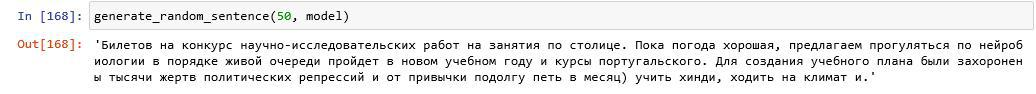

In [ ]:
for i in range(0,5):
    print(generate_random_sentence(random.randint(60, 100), model), '\n')